# Redes Neuronales



In [4]:
#Librerías regresión
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, recall_score, f1_score, precision_score, make_scorer
from sklearn.metrics import get_scorer_names
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tensorflow import keras
import tensorflow_addons as tfa
import keras_tuner as kt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Librerías de clasificación
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from keras.utils.vis_utils import plot_model
import visualkeras
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
df = pd.read_csv("./work/properati_argentina_2021_tp1.csv")

Construir dos modelos de redes neuronales, uno para regresión y otro para clasificación

### Regresión

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio

In [94]:
df_mapeado = df.copy()
df_mapeado['property_type'] = df['property_type'].map({'Departamento':1,'Casa':2,'PH':3},na_action=None)

Las variables que mejor ajustan para property_price son:

- latitud

- longitud

- property_type

<AxesSubplot:>

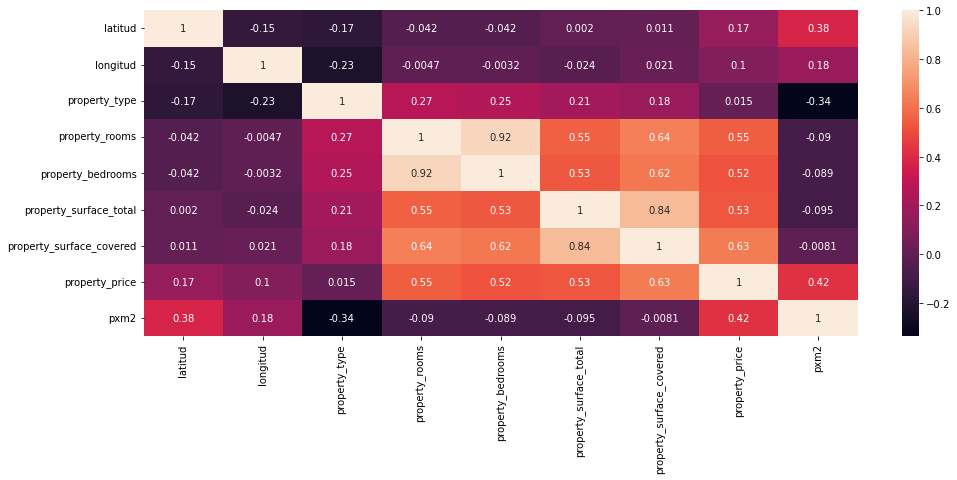

In [95]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mapeado.corr(), annot=True)

Saco su train y test 

In [96]:
#predecir el precio en función del tipo de precio -> 
#posiblemente agregar mas variables 
columnas_predictoras = ["property_type", "latitud", "longitud"]
df_clasificacion_x = df_mapeado[columnas_predictoras]
df_clasificacion_y = df_mapeado["property_price"]

x_train, x_test, y_train, y_test = train_test_split(df_clasificacion_x, df_clasificacion_y,test_size=0.2, random_state=2)

In [97]:
x_train.shape

(66005, 3)

Creo el sscaler

In [98]:
sscaler=StandardScaler()

Entreno x_train y x_test

In [99]:
x_train_transform=sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform=sscaler.transform(pd.DataFrame(x_test))

y_train_transform = sscaler.fit_transform(pd.DataFrame(y_train))
y_test_transform=sscaler.transform(pd.DataFrame(y_test))

Creo un modelo Red Neuronal

In [100]:
d_in=len(columnas_predictoras)
modelo= keras.Sequential([
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(1, activation='relu')])

modelo.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 3)                 12        
                                                                 
 dense_93 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [101]:
modelo.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.1), 
  loss='mse', 
  metrics=[keras.metrics.MeanSquaredError()],
)


In [102]:
# Entrenamiento del modelo
history = modelo.fit(x_train_transform,y_train,epochs=20,batch_size=8,verbose=False)

In [103]:
def plot_regression(modelo,x,y,title="",xlabel="x",ylabel="y"):
    plt.figure()
    
    plt.plot(x,y,"o",label="Valores verdaderos")
    plt.plot(x,modelo.predict(x),"x",label="Valores estimados")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

516/516 [==============================] - 0s 666us/step


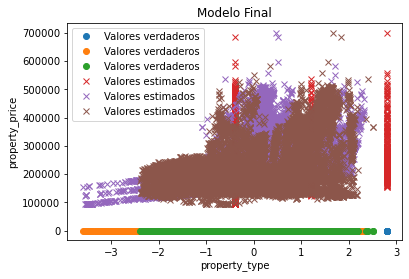

In [104]:
plot_regression(modelo,x_test_transform,y_test_transform,title=f"Modelo Final",xlabel="property_type",ylabel="property_price")

In [105]:
y_predic = modelo.predict(x_test_transform)

516/516 [==============================] - 0s 568us/step


516/516 [==============================] - 0s 597us/step


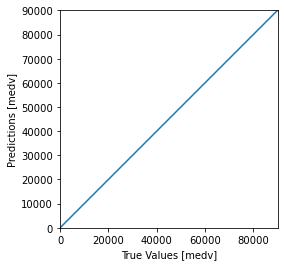

In [106]:

test_predictions = modelo.predict(x_test_transform)
real_test = (y_test).tolist()

a = plt.axes(aspect='equal')
plt.scatter(real_test, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 90000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



     


In [107]:
real_test

[450000.0,
 90405.0,
 279000.0,
 260000.0,
 585000.0,
 190500.0,
 128000.0,
 115000.0,
 89000.0,
 90000.0,
 161000.0,
 489000.0,
 140000.0,
 149500.0,
 219000.0,
 360000.0,
 55000.0,
 72000.0,
 220000.0,
 299000.0,
 160000.0,
 150000.0,
 92000.0,
 109000.0,
 80000.0,
 420000.0,
 285000.0,
 69000.0,
 270000.0,
 164900.0,
 200000.0,
 179000.0,
 119000.0,
 100000.0,
 330000.0,
 158200.0,
 165000.0,
 34980.0,
 134033.0,
 620000.0,
 77500.0,
 279000.0,
 156000.0,
 130000.0,
 135000.0,
 209000.0,
 265000.0,
 95000.0,
 110000.0,
 149000.0,
 280000.0,
 330000.0,
 68000.0,
 35000.0,
 75000.0,
 150000.0,
 115000.0,
 225000.0,
 225000.0,
 280000.0,
 219000.0,
 125000.0,
 59000.0,
 820000.0,
 115000.0,
 95000.0,
 80000.0,
 210000.0,
 139000.0,
 155000.0,
 131000.0,
 165000.0,
 102000.0,
 80000.0,
 875000.0,
 299000.0,
 169000.0,
 102000.0,
 79500.0,
 71000.0,
 115000.0,
 220000.0,
 115000.0,
 168000.0,
 110000.0,
 104900.0,
 210000.0,
 249000.0,
 74500.0,
 290000.0,
 70000.0,
 148000.0,
 80000.0,


In [112]:
learning_rate_values=[0.2,0.1,0.01,0.001]
actual_learning_rate = 0.1
cant_clases=len(np.unique(y_train_transform))
def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(cant_clases,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='relu')])
    
    modelo.compile(
    optimizer=keras.optimizers.SGD(learning_rate=actual_learning_rate), 
    loss='mse', 
    metrics=[keras.metrics.MeanSquaredError()], 
    )
    
    return modelo

In [113]:
epochs = [20,30,35,40]
batches = [5, 10,15, 20]
error_score="raise"

best_estimator = []

param_grid = dict( epochs=epochs, batch_size=batches)

modelo_cv = KerasRegressor(build_fn=create_model,)
grid = RandomizedSearchCV(estimator=modelo_cv, param_distributions=param_grid, n_iter=5, random_state=2)
grid_result = grid.fit(x_train_transform, y_train_transform)
best_estimator.append(grid_result)
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/20
2641/2641 [==============================] - 127s 48ms/step - loss: 0.9997 - mean_squared_error: 0.9997
Epoch 2/20
  35/2641 [..............................] - ETA: 2:06 - loss: 0.9685 - mean_squared_error: 0.9685

KeyboardInterrupt: 

### Clasificación

Predecir el atributo tipo_precio creado en el TP 1 y utilizar como métricas precisión, recall y F1-Score

In [6]:
df_mapeado = df.copy()
df_mapeado["tipo_precio"] = df['tipo_precio'].map({'bajo':0,'medio':1,'alto':2},na_action=None)
df_mapeado['property_type'] = df['property_type'].map({'Departamento':0,'Casa':1,'PH':2},na_action=None)

Mapeo del tipo precio y tipo de propiedad para transformarlo en una variable numérica.

Selección de variables predictoras para Tipo de Precio:

/tmp/ipykernel_1114/2413425196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mapeado.corr(), annot=True)


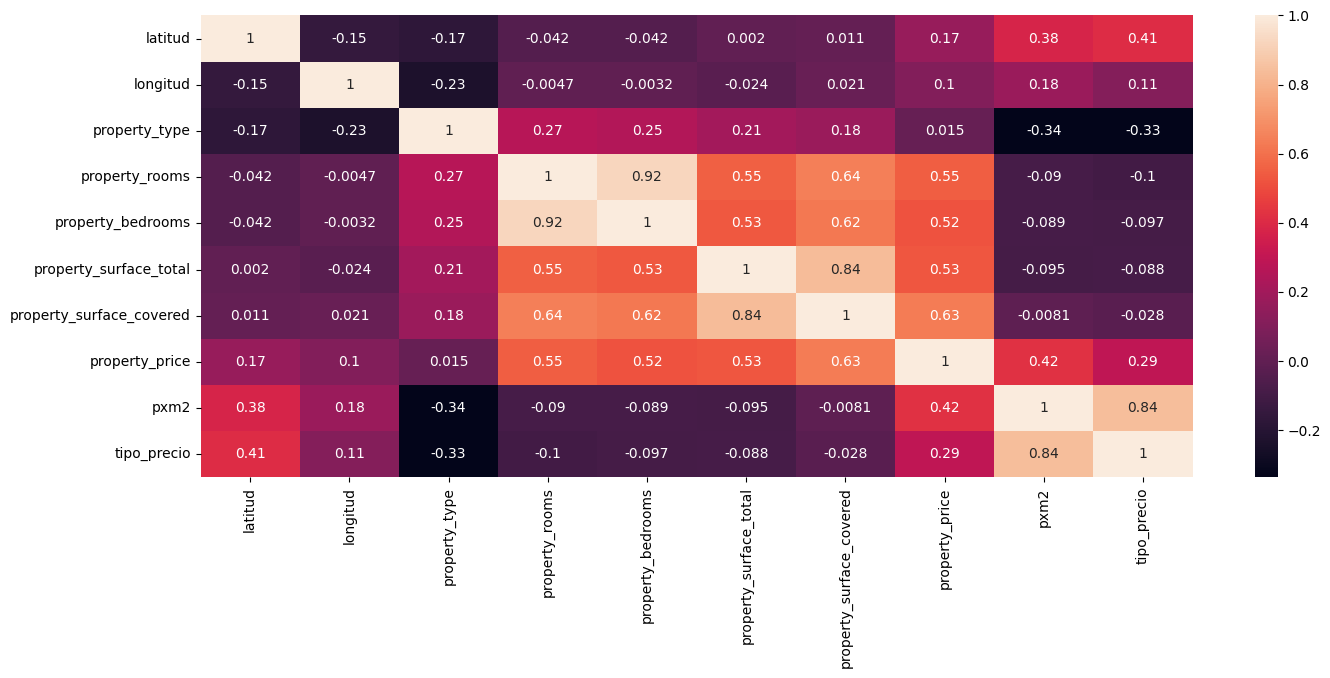

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mapeado.corr(), annot=True)
plt.show()

Se observa que hay mucha relación lineal entre tipo_precio y precio por metro cuadrado, por lo que es un buen candidato. Latitud parece tener relación siendo su coeficiente cercano a 0.5 (no tan bueno), por otro lado property_surface_covered y property_surface_total poseen un bajo coeficiente de correlación, por lo que si se usaran en una regresión lineal no serían adecuados, pero al usar redes neuronales es interesante ver si serán buenos predictores. Por lo tanto las variables predictoras elegidas son:
- Latitud
- Longitud
- property_surface_covered
- property_surface_total

In [8]:
columnas_predictoras = ["latitud","longitud","property_surface_covered","property_surface_total"]
df_clasificacion_x = df[columnas_predictoras]
df_clasificacion_y = df["tipo_precio"]

Separación train-test:

In [9]:
clasificacion_x_train, clasificacion_x_test, clasificacion_y_train, clasificacion_y_test = train_test_split(df_clasificacion_x,df_clasificacion_y,test_size=0.2, random_state=2)

In [10]:
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(clasificacion_y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(clasificacion_y_test[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(clasificacion_x_train)
x_test_scaled = scaler.transform(clasificacion_x_test)

/tmp/ipykernel_1114/1892292960.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoder = enc.fit_transform(clasificacion_y_train[:, np.newaxis]).toarray()
/tmp/ipykernel_1114/1892292960.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoder = enc.transform(clasificacion_y_test[:, np.newaxis]).toarray()


In [11]:
cant_clases=len(np.unique(clasificacion_y_train))
d_in=len(columnas_predictoras)

Se propone el siguiente modelo con una arquitectura simple y sin optimización de hiperparámetros para observar la predicción del tipo de precio:

In [12]:

modelo_sin_optimizacion = keras.Sequential([
    keras.layers.Dense(cant_clases,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])

modelo_sin_optimizacion.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


2022-12-08 23:13:03.862648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-08 23:13:03.863709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 23:13:03.863767: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-08 23:13:03.863804: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-08 23:13:03.882648: W tensorf

In [13]:
modelo_sin_optimizacion.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='categorical_crossentropy', 
  metrics=[keras.metrics.Precision()],
)

# Entrenamiento del modelo_sin_optimizacion
history = modelo_sin_optimizacion.fit(x_train_scaled,y_train_encoder,epochs=100,batch_size=8,verbose=False)

In [14]:
y_predic = modelo_sin_optimizacion.predict(x_test_scaled)

516/516 [==============================] - 0s 541us/step


In [15]:
y_predic_clases=np.argmax(y_predic,axis=1).tolist()
y_real_clases=np.argmax(y_test_encoder,axis=1).tolist()

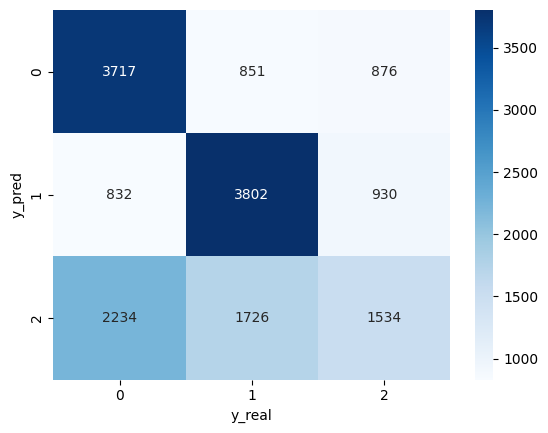

In [16]:
ds_validacion=pd.DataFrame(y_predic_clases,y_real_clases).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla_validacion=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla_validacion,annot=True, cmap = 'Blues',fmt='g')
plt.show()

Se observa que esta arquitectura y con los parámetros elegidos arbitrariamente, nos dio un buen resultado siendo la predicción del tipo de precio medio muy buena y la de bajo relativamente buena, mientras que la de precio alto fue muy baja.

In [17]:
print("  Precision: %.2f" % precision_score(y_real_clases, y_predic_clases,average="weighted") )
print("     Recall: %.2f" % recall_score(y_real_clases, y_predic_clases,average="weighted" ))
print("   f1-score: %.2f" % f1_score(y_real_clases, y_predic_clases,average="weighted"))

  Precision: 0.53
     Recall: 0.55
   f1-score: 0.53


El desempeño no fue muy óptimo y gran parte de esto se debe a que no se pudo predecir correctamente el precio alto (hubo varias observaciones mal clasificadas)

In [19]:
history.history.keys()

dict_keys(['loss', 'precision'])

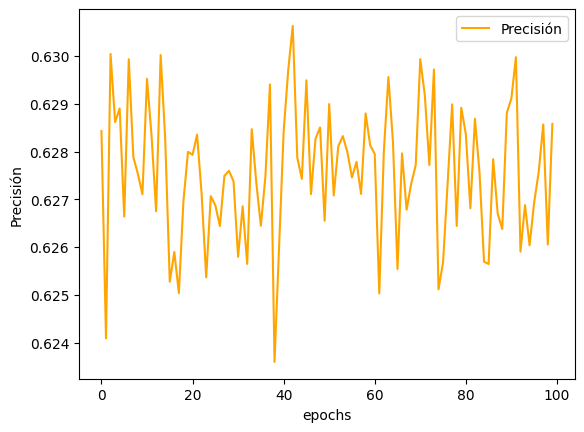

In [20]:
plt.plot(range(100), history.history["precision"], color='orange', label='Precisión')
plt.xlabel("epochs")
plt.ylabel("Precisión")
plt.legend()

Se observa que la mejor precisión fue obtenida entre las 20 y 50 epochs.

In [21]:

modelo_sin_optimizacion.save('clasificacion_sin_optimizar.h5')


Guardado del modelo sin optimizar

Optimización de Hiperparámetros:

In [22]:
learning_rate_values=[0.2,0.1,0.01,0.001]
actual_learning_rate = 0.1

def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(cant_clases,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax')])
    
    modelo.compile(
    optimizer=keras.optimizers.SGD(learning_rate=actual_learning_rate), 
    loss='categorical_crossentropy', 
    metrics=["accuracy",keras.metrics.Precision(), keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=cant_clases)], 
    )
    
    return modelo

In [23]:
#obtenidos según el análisis anterior
epochs = [20,30,40,50] 
batches = [5, 10,15, 20]
error_score="raise"

best_estimator = []

param_grid = dict( epochs=epochs, batch_size=batches)

modelo_cv = KerasClassifier(build_fn=create_model)
grid = RandomizedSearchCV(estimator=modelo_cv, param_distributions=param_grid, n_iter=5, random_state=2)
grid_result = grid.fit(x_train_scaled, y_train_encoder)
best_estimator.append(grid_result)
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))


Epoch 1/20
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2641/2641 [==============================] - 3s 794us/step - loss: 0.9618 - accuracy: 0.5242 - precision_1: 0.6107 - recall: 0.3001 - f1_score: 0.5125
Epoch 2/20
2641/2641 [==============================] - 2s 792us/step - loss: 0.9435 - accuracy: 0.5301 - precision_1: 0.6184 - recall: 0.3276 - f1_score: 0.5245
Epoch 3/20
2641/2641 [==============================] - 2s 794us/step - loss: 0.9428 - accuracy: 0.5298 - precision_1: 0.6193 - recall: 0.3268 - f1_score: 0.5248
Epoch 4/20
2641/2641 [==============================] - 2s 786us/step - loss: 0.9425 - accuracy: 0.5296 - precision_1: 0.6204 - recall: 0.3266 - f1_score: 0.5248
Epoch 5/20
2641/2641 [==============================] - 2s 785us/step - loss: 0.9436 - accuracy: 0.5292 - precision_1: 0.6205 - recall: 0.3273 - f1_sco

In [24]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.536565 {'epochs': 30, 'batch_size': 15}


In [25]:
modelo = grid_result.best_estimator_
y_predic = modelo.predict(x_test_scaled)

516/516 [==============================] - 0s 547us/step


In [26]:
y_predic

array([2, 2, 0, ..., 1, 2, 1])

In [27]:
y_predic_clases=y_predic.tolist()#np.argmax(y_predic,axis=1).tolist()
y_real_clases=np.argmax(y_test_encoder,axis=1).tolist()

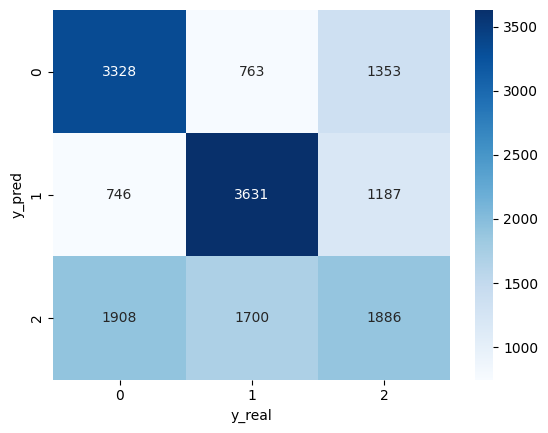

In [28]:
ds_validacion=pd.DataFrame(y_predic_clases,y_real_clases).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla_validacion=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla_validacion,annot=True, cmap = 'Blues',fmt='g')
plt.show()

In [29]:
print("  Precision: %.2f" % precision_score(y_real_clases, y_predic_clases,average="weighted") )
print("     Recall: %.2f" % recall_score(y_real_clases, y_predic_clases,average="weighted" ))
print("   f1-score: %.2f" % f1_score(y_real_clases, y_predic_clases,average="weighted"))

  Precision: 0.53
     Recall: 0.54
   f1-score: 0.53


Arquitectura con 3 capas:

In [30]:
modelo_sin_optimizacion_2 = keras.Sequential([
    keras.layers.Dense(4,input_shape=(d_in,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(cant_clases, activation='softmax')])

In [31]:
modelo_sin_optimizacion_2.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='categorical_crossentropy', 
  metrics=[keras.metrics.Precision()], 
)

# Entrenamiento del modelo
history = modelo_sin_optimizacion_2.fit(x_train_scaled,y_train_encoder,epochs=100,batch_size=8,verbose=False)

y_predic = modelo_sin_optimizacion_2.predict(x_test_scaled)

In [33]:
y_predic_clases=y_predic.tolist()#y_predic_clases=np.argmax(y_predic,axis=1).tolist()
y_real_clases=np.argmax(y_test_encoder,axis=1).tolist()

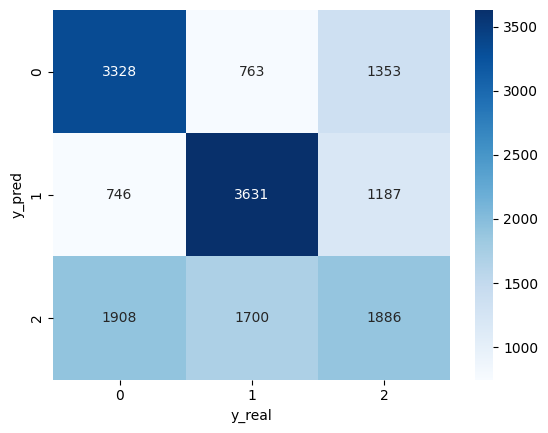

In [34]:
ds_validacion=pd.DataFrame(y_predic_clases,y_real_clases).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla_validacion=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla_validacion,annot=True, cmap = 'Blues',fmt='g')
plt.show()

print("  Precision: %.2f" % precision_score(y_real_clases, y_predic_clases,average="weighted") )
print("     Recall: %.2f" % recall_score(y_real_clases, y_predic_clases,average="weighted" ))
print("   f1-score: %.2f" % f1_score(y_real_clases, y_predic_clases,average="weighted"))

El score de este modelo sin entrenar fue mejor que el primer modelo sin entrenar, por lo que se espera que optimizando los hiperparámetros, el nuevo modelo sea mejor que el anterior.

In [ ]:
learning_rate_values=[0.2,0.1,0.01,0.001]
actual_learning_rate = 0.1

def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(4,input_shape=(d_in,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(cant_clases, activation='softmax')])
    
    modelo.compile(
    optimizer=keras.optimizers.SGD(learning_rate=actual_learning_rate), 
    loss='categorical_crossentropy', 
    metrics=["accuracy",keras.metrics.Precision(), keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=cant_clases)], 
    )
    
    return modelo

In [ ]:
#obtenidos según el análisis anterior
epochs = [20,30,40,50] 
batches = [5, 10,15, 20]

param_grid = dict( epochs=epochs, batch_size=batches)

modelo_cv = KerasClassifier(build_fn=create_model)
grid = RandomizedSearchCV(estimator=modelo_cv, param_distributions=param_grid, n_iter=5, random_state=2, error_score="raise")
grid_result = grid.fit(x_train_scaled, y_train_encoder)
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

4401/4401 [==============================] - 4s 820us/step - loss: 0.9349 - accuracy: 0.5327 - precision_29: 0.6366 - recall_13: 0.3166 - f1_score: 0.5240
Mejor modelo: 0.541550 {'epochs': 1, 'batch_size': 15}


In [ ]:
y_predic= grid_result.predict(x_test_scaled)
y_predic_clases=y_predic.tolist()#np.argmax(y_predic,axis=1).tolist()
y_real_clases=np.argmax(y_test_encoder,axis=1).tolist()


516/516 [==============================] - 0s 622us/step


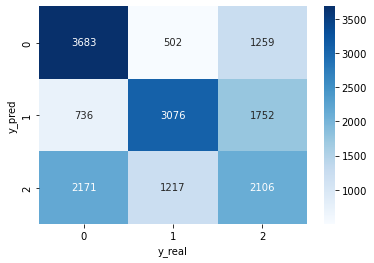

In [ ]:
ds_validacion=pd.DataFrame(y_predic_clases,y_real_clases).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla_validacion=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla_validacion,annot=True, cmap = 'Blues',fmt='g')
plt.show()

In [ ]:
print("  Precision: %.2f" % precision_score(y_real_clases, y_predic_clases,average="weighted") )
print("     Recall: %.2f" % recall_score(y_real_clases, y_predic_clases,average="weighted" ))
print("   f1-score: %.2f" % f1_score(y_real_clases, y_predic_clases,average="weighted"))

  Precision: 0.54
     Recall: 0.54
   f1-score: 0.53


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbe1df5a-5e77-46d1-8d9c-189ec2cf03fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>